In [218]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

In [219]:
model = ScaleDependentFeedbackModel(size=50, dt=0.1, dx=5)
R = np.arange(1.6, 0.3, -0.02)

# Load Simulation Snapshots

In [220]:
load = True  # set to True to load previous simulation results

if load:
    data = load_data('Results/scale_dependent_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10, snapshots11, snapshots12, snapshots13, snapshots14, snapshots15 = data

# Linearisation

## Stability Without Diffusion

I numerically solved eigenvalues for $|I\sigma-J|=0$ and plotted the maximum real parts of the eigenvalues at each rainfall value.

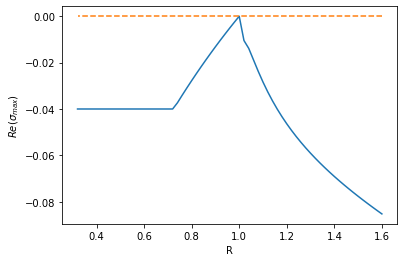

In [221]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, R, "R")

The maximum real part of the eigenvalues reaches zero at $R=1$ where the spatially homogeneous equilibria become linearly unstable to small perturbations.

## Stability With Diffusion

I numerically solved eigenvalues for $|I\sigma-J+Dk^2|=0$, the dipsersal relation, and plotted the maximum real parts of the eigenvalues at a range of $k$ values at different $R$ levels.

In [222]:
k = np.arange(0.01, 0.5, 0.01)

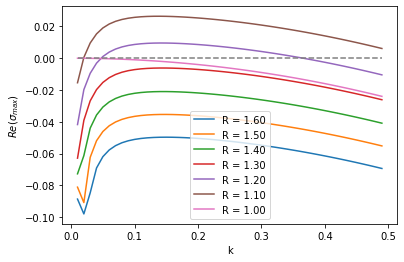

In [223]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, np.arange(1.6, 1, -0.1), "R", k)

In [224]:
turing_instability = find_bifurcation(model, 1.5, 0.1, -0.01, "R", tol=0, k=k)
print(f"Turing instability point at R = {turing_instability:.2f}")

Turing instability point at R = 1.25


The maximum eigenvalue real parts increase as $R$ decreases, with the peak at $k\approx0.15$. Diffusion-driven instability occurs when any of the eigenvalue real parts become positive for any $k$ value. Thus, pattern formation begins at $R=1.25$.

# Effects of Noise

## Additive Noise
I simulated the model at different levels of additive noise, where the noise does not depend on the variable values.

In [225]:
time_steps = 1000
model.noise = "additive"
sigma = [0.01, 0.05, 0.25]

### $\sigma=0.01$

In [226]:
if not load:
    model.sigma = sigma[0]
    snapshots1 = parameter_change(model, R, "R", time_steps)

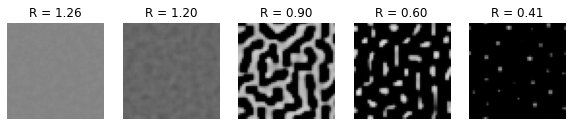

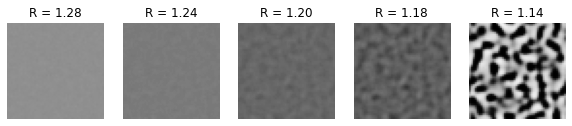

In [227]:
plot_snapshots(snapshots1, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)
plot_snapshots(snapshots1, [1.28, 1.24, 1.2, 1.18, 1.14], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.05$

In [228]:
if not load:
    model.sigma = sigma[1]
    snapshots2 = parameter_change(model, R, "R", time_steps)

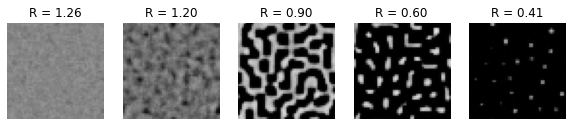

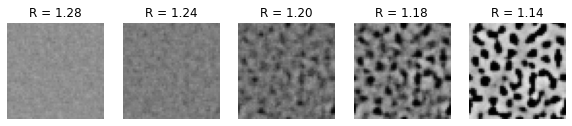

In [229]:
plot_snapshots(snapshots2, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)
plot_snapshots(snapshots2, [1.28, 1.24, 1.2, 1.18, 1.14], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.25$

In [230]:
if not load:
    model.sigma = sigma[2]
    snapshots3 = parameter_change(model, R, "R", time_steps)

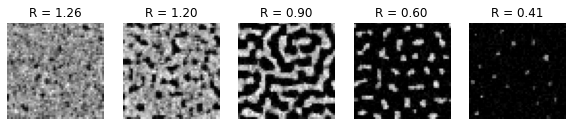

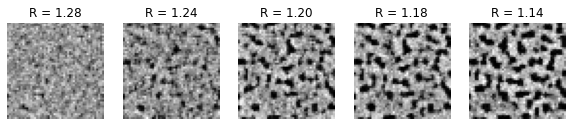

In [231]:
plot_snapshots(snapshots3, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)
plot_snapshots(snapshots3, [1.28, 1.24, 1.2, 1.18, 1.14], "R", vmin=0, vmax=20, precision=2)

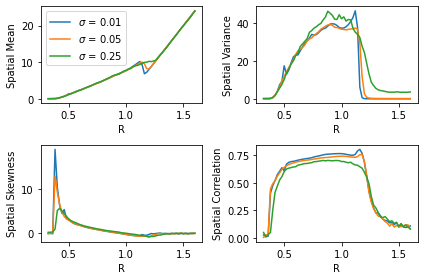

In [232]:
spatial_indicator_grid([snapshots1, snapshots2, snapshots3], "R", levels=sigma, level_name=r"$\sigma$")

## Multiplicative Noise

I simulated the model at different levels of multiplicative noise, where the noise depends linearly on the variable values.

In [233]:
model.noise = "multiplicative"
sigma = [0.01, 0.1, 0.25]

### $\sigma=0.01$

In [234]:
if not load:
    model.sigma = sigma[0]
    snapshots4 = parameter_change(model, R, "R", time_steps)

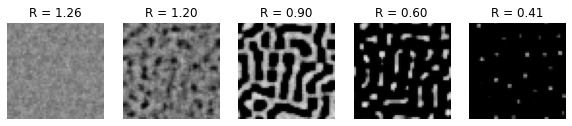

In [235]:
plot_snapshots(snapshots4, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.1$

In [236]:
if not load:
    model.sigma = sigma[1]
    snapshots5 = parameter_change(model, R, "R", time_steps)

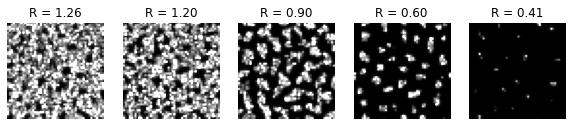

In [237]:
plot_snapshots(snapshots5, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

### $\sigma=0.25$

In [238]:
if not load:
    model.sigma = sigma[2]
    snapshots6 = parameter_change(model, R, "R", time_steps)

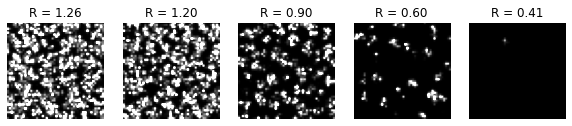

In [239]:
plot_snapshots(snapshots6, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

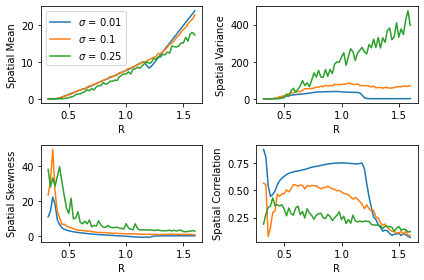

In [240]:
spatial_indicator_grid([snapshots4, snapshots5, snapshots6], "R", levels=sigma, level_name=r"$\sigma$")

## Observations

At low levels of noise, the rainfall value $R$ needs to get close to the Turing instability point for pattern formation to begin. The spatial meean sharply increases at the Turing instability point and the patterns appear to be crisper.

At higher levels of noise, pattern formation is induced by noise so that pattern onset begins earlier as the spatial mean deviates from the spatially homogeneous equilibrium earlier, resulting in a smoother transition instead of an abrupt jump. The patterns in the snapshots were fuzzier. With high multiplicative noise, pattern formation occurs much earlier, though the patterns are quite fuzzy and irregular.

The spatial indicators are largely similar for different levels of additive noise. The spatial correlation for higher levels of additive noise is slightly lower due to larger spatial perturbations.

Howeve, spatial correlation is much lower for larger multiplicative noise. This is because the noise is larger for higher variable values, which can break down the regularity of patterns.

Spatial skewness also peaks higher near the collapse point with multiplicative noise, as the cells are mostly bare with scarce vegetation and there is very low noise around the very low values. Spatial skewness starts higher even before the Turing instability point for high multiplicative noise as bare spots already begin to exist.

At high levels of multiplicative noise, spatial variance is already large before the Turing instability point as patches have already formed. Spatial variance decreases as rainfall decreases as the decreasing variable values decreases noise. There is no or limited increase in spatial variance at the Turing instability point.

## Change in Noise

### Additive Noise

I simulated the model near the Turing instability point while slowly increasing the additive noise level.

In [241]:
model.R = 1.25
model.noise = "additive"
noise = np.arange(0.01, 0.5, 0.01)

In [242]:
if load:
    snapshots7 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=30000)

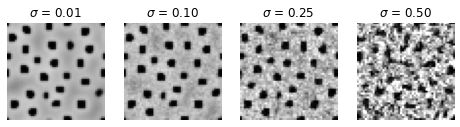

In [243]:
plot_snapshots(snapshots7, [0.01, 0.1, 0.25, 0.5], r"$\sigma$", vmin=0, vmax=20, precision=2)

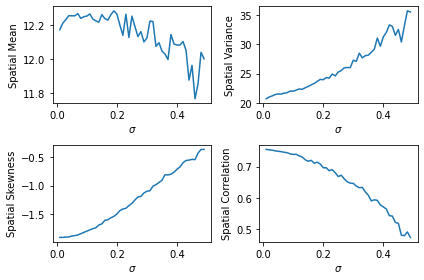

In [244]:
spatial_indicator_grid(snapshots7, r"$\sigma$")

### Multiplicative Noise

I simulated the model at the Turing instability point while slowly increasing the multiplicative noise level.

In [245]:
model.R = 1.25
model.noise = "multiplicative"
noise = np.arange(0.01, 0.25, 0.01)

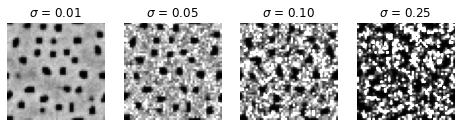

In [246]:
if load:
    snapshots8 = parameter_change(model, noise, "sigma", time_steps=1000, warm_up=10000)
plot_snapshots(snapshots8, [0.01, 0.05, 0.1, 0.25], r"$\sigma$", vmin=0, vmax=20, precision=2)

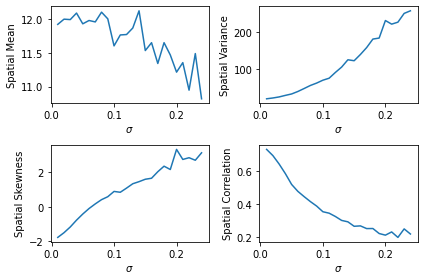

In [247]:
spatial_indicator_grid(snapshots8, r"$\sigma$")

## Observations

The results for simulating the system while slowly increasing the noise largely corrobate the earlier results for both additive and multiplicative noise.

Spatial mean decreased as noise increased as the noise disturbed the patterns and reduced productivity.

Spatial variance increased as noise increased due to larger fluctuations. Interestingly, the spatial variance only increased after a certain level of additive noise.

Spatial skewness increased as noise increased due to the presence of more bare cells.

Spatial correlation decreased as noise increased due to the noise breaking down the regularity of patterns.

At the Turing instability point, multiplicative noise causes larger levels of noise due to the noise being state-dependent. This leads to lower spatial mean, higher spatial variance, higher spatial skewness and spatial correlation compared to additive noise.

# Duration of Run

I simulated the model at the Turing instability point at different levels of multiplicative noise for a large number of time steps.

In [248]:
model.R = 1.25
model.noise = "multiplicative"
time_steps = 10000
sigma = [0.01, 0.1, 0.25]

## $\sigma=0.01$

In [249]:
if load:
    model.sigma = sigma[0]
    snapshots9 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots9 = snapshots9.iloc[::100]

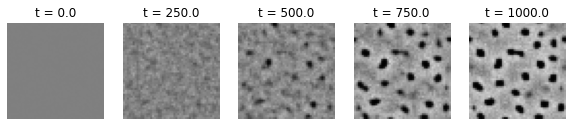

In [250]:
plot_snapshots(snapshots9, [0, 250, 500, 750, 1000], "t", vmin=0, vmax=20)

## $\sigma=0.1$

In [251]:
if load:
    model.sigma = sigma[1]
    snapshots10 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots10 = snapshots10.iloc[::100]

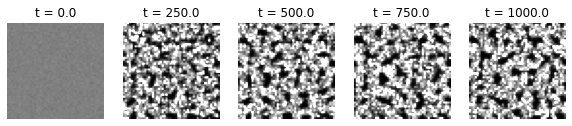

In [252]:
plot_snapshots(snapshots10, [0, 250, 500, 750, 1000], "t", vmin=0, vmax=20)

## $\sigma=0.25$

In [253]:
if load:
    model.sigma = sigma[2]
    snapshots11 = simulate_time_steps(model, time_steps, *model.initialisation())
    snapshots11 = snapshots11.iloc[::100]

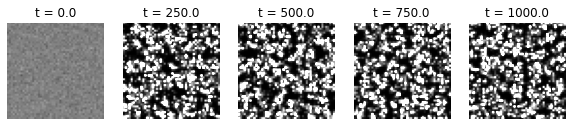

In [254]:
plot_snapshots(snapshots11, [0, 250, 500, 750, 1000], "t", vmin=0, vmax=20)

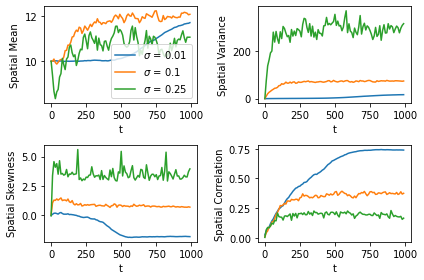

In [255]:
spatial_indicator_grid([snapshots9, snapshots10, snapshots11], "t", levels=sigma, level_name=r"$\sigma$")

When the level of noise is higher pattern formation occurs earlier. We also observe higher spatial variance, higher spatial skewness and lower spatial correlation for higher levels of noise, as shown earlier.

# Effect of Preventive Measures

I simulated the effect of reducing the mortality of plants when the rainfall falls below a certain value to see if it can prevent desertification. Mortality of plants can be due to natural mortality or grazing. Since there will always be natural mortality I assume a minimum plant mortality of 0.1.

In [256]:
model.noise = "additive"
model.sigma_B = 0.25

d0 = 0.25
dd = [0, -0.0001, -0.001, -0.01]
d_bounds = (0.1, None)

## $\frac{dR}{dt}=-0.001$

In [257]:
dR = -0.0001
time_steps = 1000

### Preventive Measues at $R=0.45$

In [258]:
R0 = 0.5

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

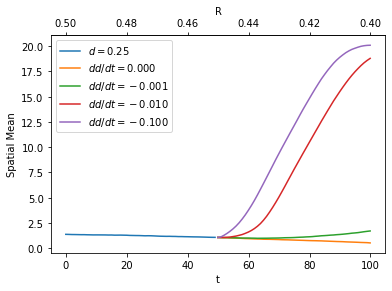

In [259]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots12 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.45, b_bounds=d_bounds, u=(P, W, O), warm_up=1000)
    snapshots12 = [snapshots.iloc[::10] for snapshots in snapshots12]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots12:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

### Preventive Measures at $R=0.4$

In [260]:
R0 = 0.45

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

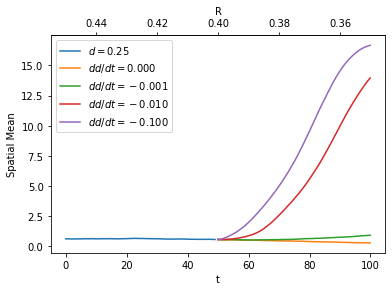

In [261]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots13 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.4, b_bounds=d_bounds, u=(P, W, O), warm_up=10000)
    snapshots13 = [snapshots.iloc[::10] for snapshots in snapshots13]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots13:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

## $\frac{dR}{dt}=-0.01$

In [262]:
dR = -0.001
time_steps = 100

### Preventive Measures at $R=0.45$

In [263]:
R0 = 0.5

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

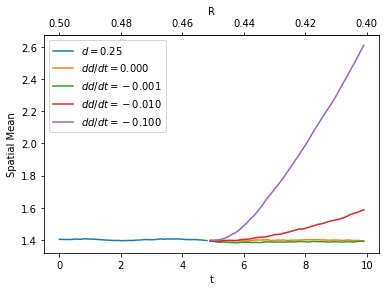

In [264]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots14 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.45, b_bounds=d_bounds, u=(P, W, O), warm_up=10000)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots14:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

### Preventive measures at $R=0.4$

In [265]:
R0 = 0.45

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

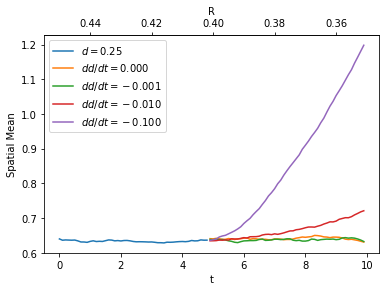

In [266]:
if not load:
    model.R = R0
    model.d = d0
    P, W, O = model.initialisation()
    P = snapshots1.iloc[np.argmin(np.abs(snapshots1.index - R0))]

    snapshots15 = preventive_measure(model, time_steps, R0, dR, d0, dd, "R", "d", 0.4, b_bounds=d_bounds, u=(P, W, O), warm_up=10000)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots15:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$d=0.25$"] + [fr"$dd/dt={dd_step/model.dt:.3f}$" for dd_step in dd])

## Observations

When the reduction of plant mortality is fast enough to overcome the increasingly harsh environment from decreasing rainfall, then vegetation recovers in the system. However, if the reduction is insufficiently fast, then desertification continues.

When the decrease in rainfall is faster, then a faster reducation rate in plant mortality is required for the system to recover. The faster the reduction rate in plant mortality, the faster and sooner recovery occurs.

When the preventive measures take place closer to the deterministic bifurcation point of collapse, then the mortality needs to reduce more quickly as there is less time for recovery to occur.

# Spatial Spectral Properties

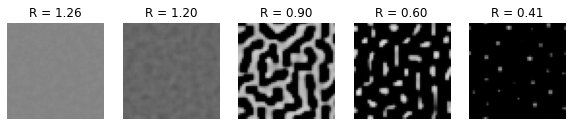

In [267]:
plot_snapshots(snapshots1, [1.26, 1.2, 0.9, 0.6, 0.41], "R", vmin=0, vmax=20, precision=2)

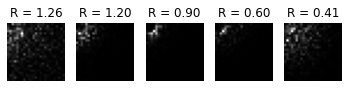

In [268]:
plot_power_spectra(snapshots1, [1.26, 1.2, 0.9, 0.6, 0.41], "R", precision=2)

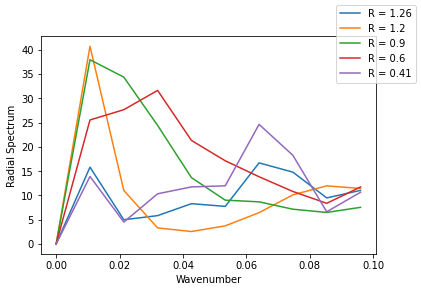

In [269]:
plot_radial_spectra(snapshots1, model.dx, [1.26, 1.2, 0.9, 0.6, 0.41], "R")

I plotted the power spectra and radial spectra of the snapshots at different rainfall values. The power spectra exhibited a ring when patterns were present in the snapshot; this is shown by the peaks in the radial spectra at a particular wavenumber.

Note: The power and radial spectra have not been confirmed to be working.

# Homogeneous Equilibria

The homogeneous equilibria occur when diffusion is zero and local reaction rates are zero.

Thus,

$R-\alpha O\frac{P+W_0k_2}{P+k_2}=0$

$\alpha O\frac{P+W_0k_2}{P+k_2}-g_{max}\frac{W}{W+k_1}P-r_W W=0$

$(cg_{max}\frac{W}{W+k_1}-d)P=0$

Rearranging, we get the following homogeneous equilibria:

$\bar{W}=\frac{k_1d}{cg_{max}-d}$

$\bar{P}=\frac{c}{d}(R-r_W\bar{W})$

$\bar{O}=\frac{R}{\alpha}\frac{P+k_2}{P+W_0 k_2}$

When the plant density equilibrium falls below zero, we get the plantless equilibrium:

$\bar{P}=0$

$\bar{W}=\frac{R}{r_W}$

$\bar{O}=\frac{R}{\alpha W_0}$


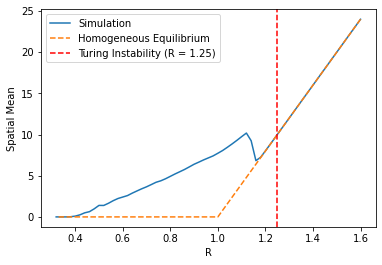

In [270]:
model = ScaleDependentFeedbackModel()

fig, ax = plt.subplots()
plot_spatial_indicator(ax, snapshots1, "mean", "R")
plot_equilibria(ax, model, R, "R")
ax.axvline(turing_instability, linestyle='--', color="red")
ax.legend(["Simulation", "Homogeneous Equilibrium", f"Turing Instability (R = {turing_instability:.2f})"])

I plotted the simulation results against the homogeneous equilibria. The simulation closely followed the homogeneous equilibrium before pattern formation occurs. Eventually the simulation reaches the bare state equilibrium at zero.

I also plotted the Turing instability point at $R=1.2$ and observe that pattern formation occurs shortly after. Pattern formation lags because the rainfall value decreases before enough time steps have been simulated for pattern formation to occur.

We observe that pattern formation results in an increase in the spatial mean and subsequent lower rate of plant density decrease due to higher productivity of resources. This means that the system reaches collapse at lower rainfall values than if the system remained homogeneous with no patterns.

# Save Simulation Snapshots

In [271]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10, snapshots11, snapshots12, snapshots13, snapshots14, snapshots15)
    save_data('Results/scale_dependent_model.dat', data)